# Exercício de aula de Modelos Lineares (04/09)

Histograma dos dados de velocidade e peso de cada carro.

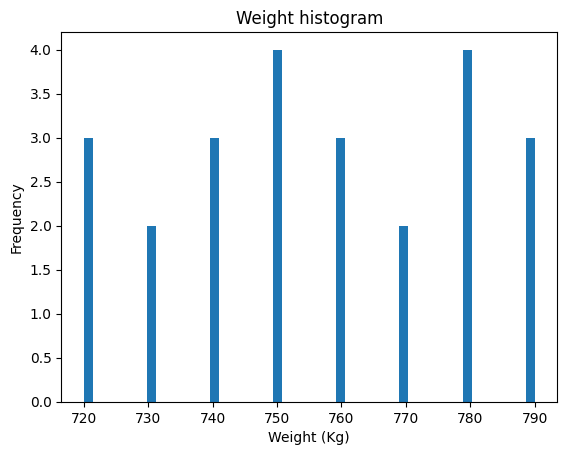

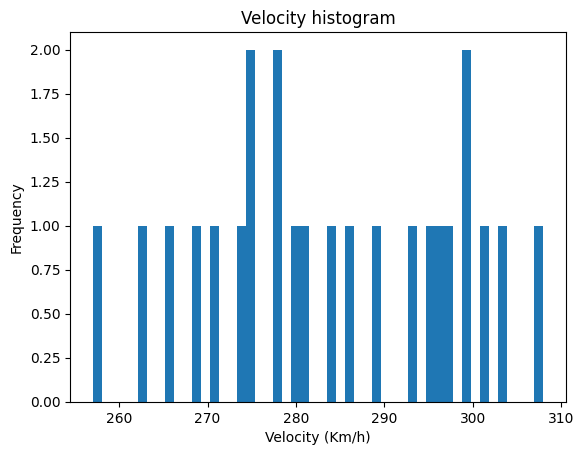

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

weights = [720, 720, 720, 730, 730, 740, 740, 740, 750, 750, 750, 750, 760, 760, 760, 770, 770, 780, 780, 780, 780, 790, 790, 790]
velocity=[257, 263, 266, 269, 271, 275, 274, 278, 278, 275, 280, 284, 281, 286, 289, 293, 297, 295, 299, 299, 301, 296, 303, 308]

plt.title('Weight histogram')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.hist(weights, bins=50)
plt.show()

plt.title('Velocity histogram')
plt.xlabel('Velocity (Km/h)')
plt.ylabel('Frequency')
plt.hist(velocity, bins=50)
plt.show()

Gráfico de velocidade por peso

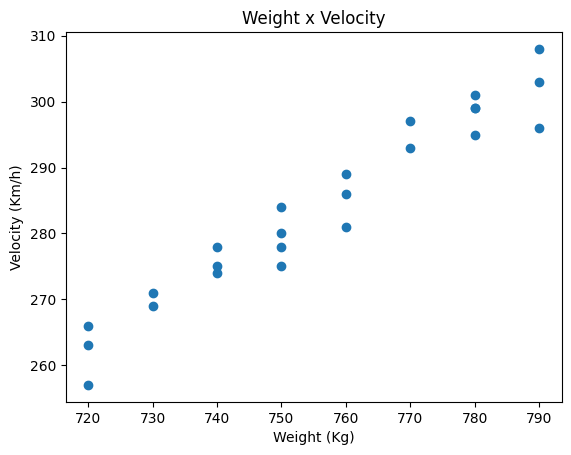

In [6]:
plt.title('Weight x Velocity')
plt.xlabel('Weight (Kg)')
plt.ylabel('Velocity (Km/h)')
plt.scatter(weights, velocity)
plt.show()

Aplicando Modelo de Regressão Linear

========= Resultado da regressão linear: ===============

y = -156.63 + 0.58x
β_0 = -156.63
β_1 = 0.58


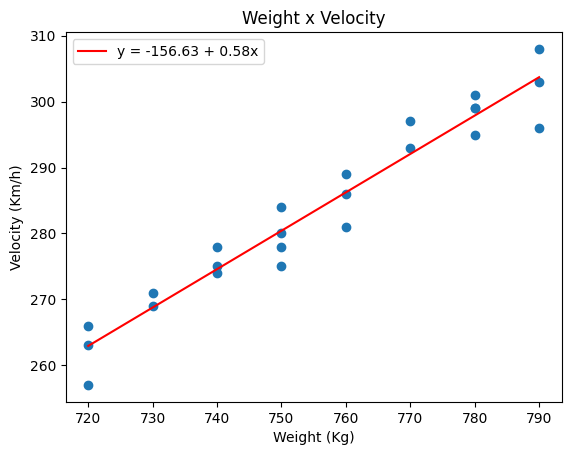

In [15]:
x_mean = np.mean(weights)
y_mean = np.mean(velocity)
N = len(weights)

numerator = 0
denominator = 0

for i in range(N):
    numerator += velocity[i]*(weights[i] - x_mean)
    denominator += (weights[i] - x_mean) ** 2

b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

print('========= Resultado da regressão linear: ===============\n')
print(f'y = {b0:.2f} + {b1:.2f}x')
print(f'β_0 = {b0:.2f}')
print(f'β_1 = {b1:.2f}')

plt.title('Weight x Velocity')
plt.xlabel('Weight (Kg)')
plt.ylabel('Velocity (Km/h)')
plt.scatter(weights, velocity)
plt.plot([min(weights), max(weights)], [b0 + b1 * min(weights), b0 + b1 * max(weights)], color='red', label=f'y = {b0:.2f} + {b1:.2f}x')
plt.legend()
plt.show()



Teste de hipótese para 99% de significância:

1_F_22(0,01) = 7,95\
H_0: β_1 = 0\
H_1: β_1 != 0

In [19]:
SQE = 0
for i in range(N):
    SQE += (velocity[i] - (b0 + b1 * weights[i])) ** 2

SQReg = 0

for i in range(N):
    SQReg += (b0 + b1 * weights[i] - y_mean) ** 2

SQT = SQE + SQReg

print('========= Resultado do teste de hipótese: ===============\n')
print(f'SQE = {SQE:.2f}')
print(f'SQReg = {SQReg:.2f}')
print(f'SQT = {SQT:.2f}')

F_0 = SQReg / (SQE / (N-2))

print(f'F_0 = {F_0:.2f}')

F_1_22 = 7.95

if F_0 > F_1_22:
    print('Hipótese nula rejeitada. O modelo MRLS se ajusta melhor aos dados.')
else:
    print('Hipótese nula não rejeitada.')

========= Resultado do teste de hipótese: ===============

SQE = 269.26
SQReg = 4197.70
SQT = 4466.96
F_0 = 342.97
Hipótese nula rejeitada. O modelo MRLS se ajusta melhor aos dados.
